<a href="https://colab.research.google.com/github/beseka/aiimagemodel/blob/main/CS412_HW1_barisserhatkaplan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, random, numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
SEED = 42
os.environ["PYTHONHASHSEED"] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

#print("TensorFlow:", tf.__version__)

In [ ]:
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full,
    test_size=0.20,
    random_state=SEED,
    shuffle=True,
    stratify=y_train_full
)

In [ ]:
print("raw data dtype:", x_train_full.dtype)
print(f"Train shape:      {x_train.shape}, y: {y_train.shape}, 80%")
print(f"Validation shape: {x_val.shape},   y: {y_val.shape},   20%")
print(f"Test shape:       {x_test.shape},  y: {y_test.shape}, 10k sample")

print(f"\nTrain sample {x_train.shape[0] + x_val.shape[0]}")
print(f"Train sample {x_test.shape[0]}")
class_names = [
    "T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

def class_counts(y):
    counts = np.bincount(y, minlength=10)
    return {class_names[i]: int(counts[i]) for i in range(10)}

print("\nClass dist. (train):", class_counts(y_train))
print("Class dist. (val):  ", class_counts(y_val))
print("Class dist. (test): ", class_counts(y_test))

raw data dtype: uint8
Train shape:      (48000, 28, 28), y: (48000,), 80%
Validation shape: (12000, 28, 28),   y: (12000,),   20%
Test shape:       (10000, 28, 28),  y: (10000,), 10k sample

Train sample 60000
Train sample 10000

Class dist. (train): {'T-shirt/Top': 4800, 'Trouser': 4800, 'Pullover': 4800, 'Dress': 4800, 'Coat': 4800, 'Sandal': 4800, 'Shirt': 4800, 'Sneaker': 4800, 'Bag': 4800, 'Ankle boot': 4800}
Class dist. (val):   {'T-shirt/Top': 1200, 'Trouser': 1200, 'Pullover': 1200, 'Dress': 1200, 'Coat': 1200, 'Sandal': 1200, 'Shirt': 1200, 'Sneaker': 1200, 'Bag': 1200, 'Ankle boot': 1200}
Class dist. (test):  {'T-shirt/Top': 1000, 'Trouser': 1000, 'Pullover': 1000, 'Dress': 1000, 'Coat': 1000, 'Sandal': 1000, 'Shirt': 1000, 'Sneaker': 1000, 'Bag': 1000, 'Ankle boot': 1000}


In [ ]:
print("\nClass dist. (train):", class_counts(y_train))
print("Class dist. (val):  ", class_counts(y_val))
print("Class dist. (test): ", class_counts(y_test))


Class dist. (train): {'T-shirt/Top': 4800, 'Trouser': 4800, 'Pullover': 4800, 'Dress': 4800, 'Coat': 4800, 'Sandal': 4800, 'Shirt': 4800, 'Sneaker': 4800, 'Bag': 4800, 'Ankle boot': 4800}
Class dist. (val):   {'T-shirt/Top': 1200, 'Trouser': 1200, 'Pullover': 1200, 'Dress': 1200, 'Coat': 1200, 'Sandal': 1200, 'Shirt': 1200, 'Sneaker': 1200, 'Bag': 1200, 'Ankle boot': 1200}
Class dist. (test):  {'T-shirt/Top': 1000, 'Trouser': 1000, 'Pullover': 1000, 'Dress': 1000, 'Coat': 1000, 'Sandal': 1000, 'Shirt': 1000, 'Sneaker': 1000, 'Bag': 1000, 'Ankle boot': 1000}


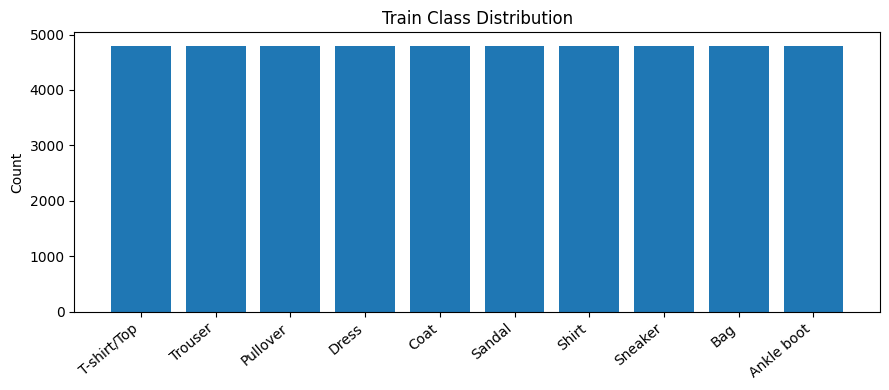

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def plot_class_counts(y, title):
    counts = np.bincount(y, minlength=10)
    plt.figure(figsize=(9,4))
    plt.bar(range(10), counts)
    plt.xticks(range(10), class_names, rotation=40, ha="right")
    plt.ylabel("Count")
    plt.title(title)
    plt.tight_layout()
    plt.show()
    return counts

train_counts = plot_class_counts(y_train, "Train Class Distribution")


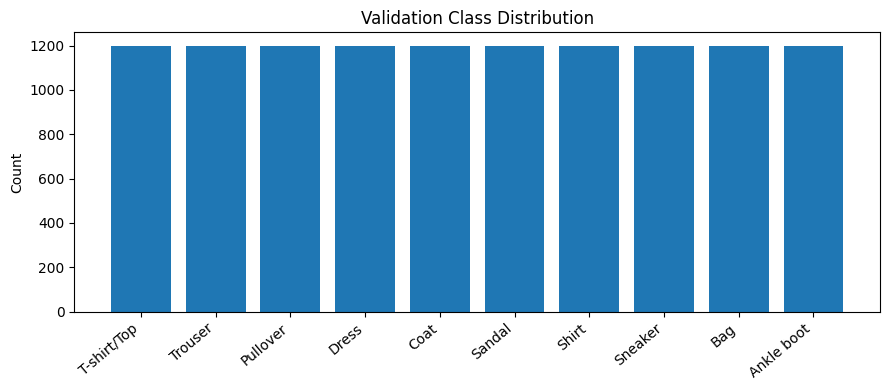

In [ ]:
train_counts = plot_class_counts(y_val, "Validation Class Distribution")

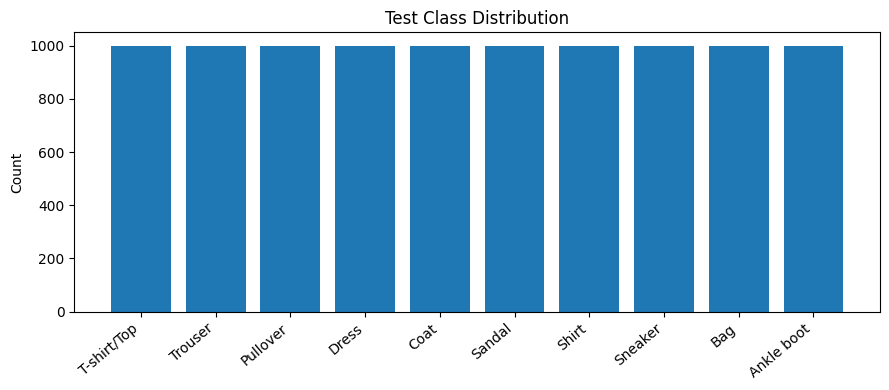

In [ ]:
train_counts = plot_class_counts(y_test, "Test Class Distribution")

In [ ]:
import pandas as pd
xtr = x_train.astype(np.float32)

global_mean = xtr.mean()
global_std  = xtr.std(ddof=0)

print(f"Global mean of pixel values (train): {global_mean:.2f}")
print(f"Global std  of pixel values (train): {global_std:.2f}")

per_class_means = []
for c in range(10):
    cls_mean = xtr[y_train == c].mean()
    per_class_means.append((class_names[c], cls_mean))

df_means = pd.DataFrame(per_class_means, columns=["Class", "MeanIntensity_0to255"])\
           .sort_values("MeanIntensity_0to255", ascending=False)
df_means

Global mean of pixel values (train): 72.99
Global std  of pixel values (train): 90.06


,Class,MeanIntensity_0to255
4,Coat,98.100266
2,Pullover,96.491486
8,Bag,90.169479
6,Shirt,84.826134
0,T-shirt/Top,82.849686
9,Ankle boot,76.760902
3,Dress,66.121811
1,Trouser,56.987144
7,Sneaker,42.837761
5,Sandal,34.800133


<Axes: xlabel='Class'>

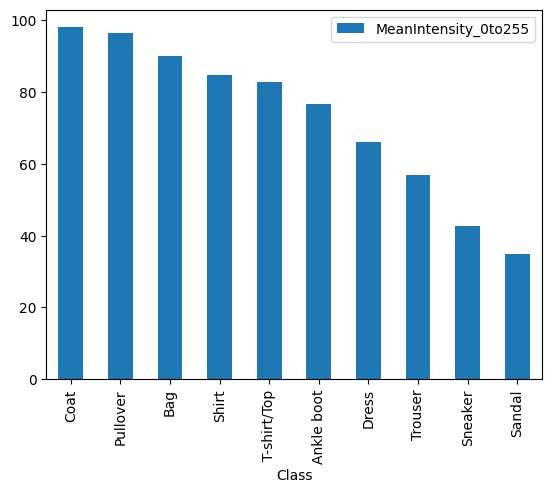

In [ ]:
df_means.plot.bar(x="Class", y="MeanIntensity_0to255")

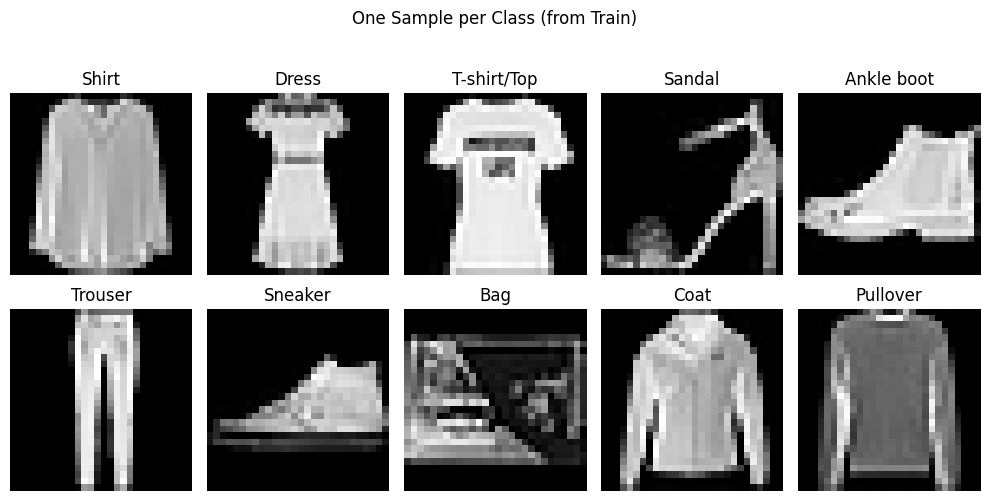

In [ ]:
picked_idx = []
seen = set()
for i, (img, lab) in enumerate(zip(x_train, y_train)):
    if lab not in seen:
        picked_idx.append(i)
        seen.add(lab)
    if len(seen) == 10:
        break

fig, axes = plt.subplots(2, 5, figsize=(10,5))
for ax, idx in zip(axes.ravel(), picked_idx):
    ax.imshow(x_train[idx], cmap="gray", vmin=0, vmax=255)
    ax.set_title(class_names[y_train[idx]])
    ax.axis("off")

plt.suptitle("One Sample per Class (from Train)", y=1.03, fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
print("Shapes:")
print("  Train:", x_train.shape)
print("  Val  :", x_val.shape)
print("  Test :", x_test.shape )

# ---- 3D -> 2D (n_samples, 28*28) ----
X_train_flat_raw = x_train.reshape(len(x_train), -1).astype(np.float32)
X_val_flat_raw   = x_val.reshape(len(x_val), -1).astype(np.float32)
X_test_flat_raw  = x_test.reshape(len(x_test), -1).astype(np.float32)

print("\nFlatten shapes:")
print("  Train:", X_train_flat_raw.shape)
print("  Val  :", X_val_flat_raw.shape)
print("  Test :", X_test_flat_raw.shape)


Shapes:
  Train: (48000, 28, 28)
  Val  : (12000, 28, 28)
  Test : (10000, 28, 28)

Flatten shapes:
  Train: (48000, 784)
  Val  : (12000, 784)
  Test : (10000, 784)


In [ ]:
def report_stats(label, X):
    # X: (n_samples, n_features)
    g_mean = X.mean()
    g_std  = X.std()
    pf_mean = X.mean(axis=0)   # per-feature mean
    pf_std  = X.std(axis=0)    # per-feature std
    print(f"{label} — global mean: {g_mean:.4f}, global std: {g_std:.4f}")
    print(f"{label} — per-feature mean avg: {pf_mean.mean():.4f}, std of means: {pf_mean.std():.4f}")
    print(f"{label} — per-feature std  avg: {pf_std.mean():.4f},  std of stds: {pf_std.std():.4f}")

print("\n[BEFORE SCALING] Raw (0–255) stats:")
report_stats("Train", X_train_flat_raw)
report_stats("Val  ", X_val_flat_raw)
report_stats("Test ", X_test_flat_raw)


[BEFORE SCALING] Raw (0–255) stats:
Train — global mean: 72.9944, global std: 90.0594
Train — per-feature mean avg: 72.9945, std of means: 49.4920
Train — per-feature std  avg: 70.1224,  std of stds: 27.2775
Val   — global mean: 72.7238, global std: 89.8681
Val   — per-feature mean avg: 72.7239, std of means: 49.3163
Val   — per-feature std  avg: 69.9785,  std of stds: 27.3345
Test  — global mean: 73.1466, global std: 89.8733
Test  — per-feature mean avg: 73.1466, std of means: 49.4345
Test  — per-feature std  avg: 69.9547,  std of stds: 27.1988


In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler(with_mean=True, with_std=True)
X_train_std = scaler.fit_transform(X_train_flat_raw)
X_val_std   = scaler.transform(X_val_flat_raw)
X_test_std  = scaler.transform(X_test_flat_raw)

print("Standardized shapes (not will change, just scaling):")
print("  Train:", X_train_std.shape)
print("  Val  :", X_val_std.shape)
print("  Test :", X_test_std.shape)

print("\n \n[AFTER SCALING] Z-score stats:")
report_stats("Train", X_train_std)
report_stats("Val  ", X_val_std)
report_stats("Test ", X_test_std)

Standardized shapes (not will change, just scaling):
  Train: (48000, 784)
  Val  : (12000, 784)
  Test : (10000, 784)

 
[AFTER SCALING] Z-score stats:
Train — global mean: 0.0000, global std: 1.0000
Train — per-feature mean avg: 0.0000, std of means: 0.0000
Train — per-feature std  avg: 1.0000,  std of stds: 0.0001
Val   — global mean: -0.0037, global std: 1.0088
Val   — per-feature mean avg: -0.0037, std of means: 0.0066
Val   — per-feature std  avg: 1.0034,  std of stds: 0.1043
Test  — global mean: 0.0018, global std: 1.0159
Test  — per-feature mean avg: 0.0018, std of means: 0.0089
Test  — per-feature std  avg: 1.0053,  std of stds: 0.1457


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from IPython.display import display

In [ ]:
k_values = [1, 3, 5, 7]
metrics  = ["euclidean", "manhattan"]

In [ ]:
rows = []
for metric in metrics:
    for k in k_values:
        clf = KNeighborsClassifier(n_neighbors=k, metric=metric, n_jobs=-1)
        clf.fit(X_train_std, y_train)
        y_pred = clf.predict(X_val_std)
        acc = accuracy_score(y_val, y_pred)
        rows.append({"k": k, "metric": metric, "val_accuracy": acc})

df_results = pd.DataFrame(rows).sort_values(["metric", "k"]).reset_index(drop=True)
display(df_results)

best = df_results.sort_values(["val_accuracy", "k"], ascending=[False, True]).iloc[0]
print(f"Best -> k={best.k}, metric={best.metric}, val_acc={best.val_accuracy:.4f}")

,k,metric,val_accuracy
0,1,euclidean,0.852083
1,3,euclidean,0.855333
2,5,euclidean,0.854833
3,7,euclidean,0.856250
4,1,manhattan,0.857000
5,3,manhattan,0.863083
6,5,manhattan,0.866083
7,7,manhattan,0.864333


Best -> k=5, metric=manhattan, val_acc=0.8661


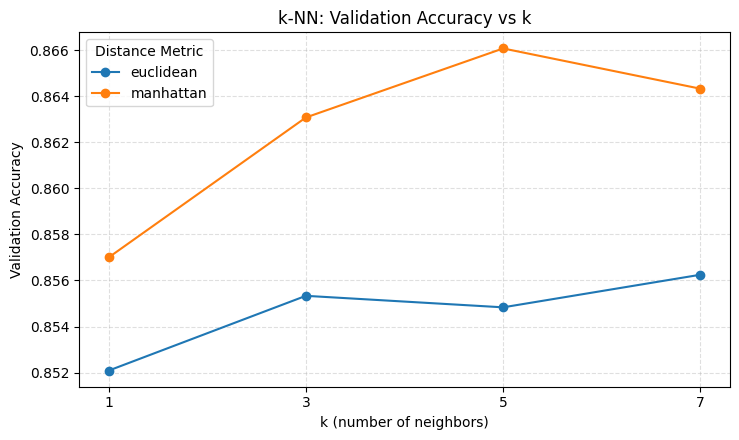

In [ ]:
import matplotlib.pyplot as plt

pivot = df_results.pivot(index="k", columns="metric", values="val_accuracy")

plt.figure(figsize=(7.5, 4.5))
for metric in pivot.columns:
    plt.plot(pivot.index, pivot[metric], marker="o", label=metric)

plt.xlabel("k (number of neighbors)")
plt.ylabel("Validation Accuracy")
plt.title("k-NN: Validation Accuracy vs k")
plt.xticks(pivot.index, pivot.index)
plt.legend(title="Distance Metric")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import time
from sklearn.neighbors import KNeighborsClassifier

for var in ["X_train_std", "X_val_std", "X_test_std", "y_train", "y_val", "y_test"]:
    assert var in globals(), f"{var} is missing. Run previous steps before this cell."

X_dev_std = np.vstack([X_train_std, X_val_std])
y_dev     = np.concatenate([y_train, y_val])

print("Dev (train+val) shape:", X_dev_std.shape, "| Test shape:", X_test_std.shape)


knn = KNeighborsClassifier(n_neighbors=5, metric="manhattan", n_jobs=-1)


t0 = time.perf_counter()
knn.fit(X_dev_std, y_dev)
t1 = time.perf_counter()
train_time = t1 - t0
print(f"Training time (fit): {train_time:.4f} s")


Dev (train+val) shape: (60000, 784) | Test shape: (10000, 784)
Training time (fit): 0.0346 s


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

t2 = time.perf_counter()
y_pred = knn.predict(X_test_std)
t3 = time.perf_counter()
pred_time = t3 - t2


acc   = accuracy_score(y_test, y_pred)
prec  = precision_score(y_test, y_pred, average="macro", zero_division=0)
rec   = recall_score(y_test, y_pred, average="macro", zero_division=0)
f1    = f1_score(y_test, y_pred, average="macro", zero_division=0)

print(f"Overall Accuracy: {acc:.4f}")
print(f"Macro Precision : {prec:.4f}")
print(f"Macro Recall    : {rec:.4f}")
print(f"Macro F1-score  : {f1:.4f}")
print(f"Prediction time (on test): {pred_time:.4f} s")


Overall Accuracy: 0.8613
Macro Precision : 0.8625
Macro Recall    : 0.8613
Macro F1-score  : 0.8609
Prediction time (on test): 698.0971 s


In [ ]:
#k-NN is leazy learner, thats mean is training time is low but prediction time is high because it is depend on neighbours.

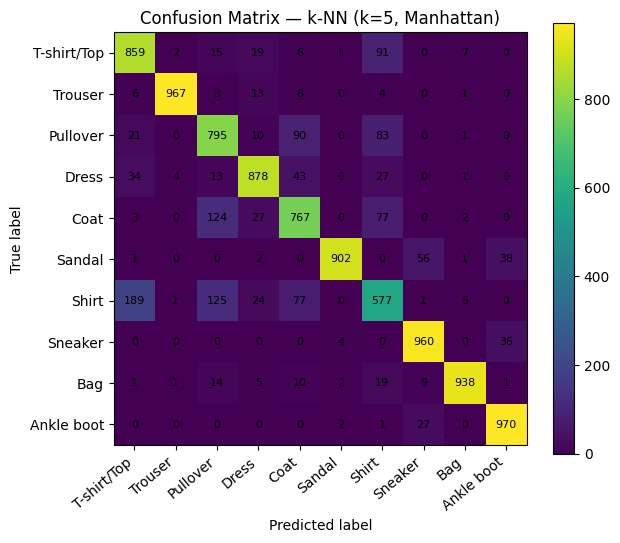


Per-class metrics (precision, recall, f1, support):
T-shirt/Top  | P: 0.771  R: 0.859  F1: 0.813  N: 1000
Trouser      | P: 0.992  R: 0.967  F1: 0.979  N: 1000
Pullover     | P: 0.730  R: 0.795  F1: 0.761  N: 1000
Dress        | P: 0.898  R: 0.878  F1: 0.888  N: 1000
Coat         | P: 0.768  R: 0.767  F1: 0.767  N: 1000
Sandal       | P: 0.990  R: 0.902  F1: 0.944  N: 1000
Shirt        | P: 0.656  R: 0.577  F1: 0.614  N: 1000
Sneaker      | P: 0.912  R: 0.960  F1: 0.935  N: 1000
Bag          | P: 0.980  R: 0.938  F1: 0.959  N: 1000
Ankle boot   | P: 0.928  R: 0.970  F1: 0.949  N: 1000

Worst 3 classes by F1:
  Shirt -> F1=0.614
  Pullover -> F1=0.761
  Coat -> F1=0.767

Best 3 classes by F1:
  Trouser -> F1=0.979
  Bag -> F1=0.959
  Ankle boot -> F1=0.949


In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

local_class_names = globals().get("class_names", [str(i) for i in range(10)])

cm = confusion_matrix(y_test, y_pred, labels=range(10))

plt.figure(figsize=(6.5, 5.5))
plt.imshow(cm, interpolation="nearest")
plt.title("Confusion Matrix — k-NN (k=5, Manhattan)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks(range(10), local_class_names, rotation=40, ha="right")

plt.yticks(range(10), local_class_names)
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", fontsize=8)
plt.tight_layout()
plt.show()

prec_c, rec_c, f1_c, sup_c = precision_recall_fscore_support(
    y_test, y_pred, labels=range(10), average=None, zero_division=0
)

print("\nPer-class metrics (precision, recall, f1, support):")
for i, name in enumerate(local_class_names):
    print(f"{name:12s} | P: {prec_c[i]:.3f}  R: {rec_c[i]:.3f}  F1: {f1_c[i]:.3f}  N: {sup_c[i]}")

order = np.argsort(f1_c)
print("\nWorst 3 classes by F1:")
for idx in order[:3]:
    print(f"  {local_class_names[idx]} -> F1={f1_c[idx]:.3f}")

print("\nBest 3 classes by F1:")
for idx in order[-3:][::-1]:
    print(f"  {local_class_names[idx]} -> F1={f1_c[idx]:.3f}")

In [ ]:
for var in ["y_test", "y_pred", "x_test"]:
    assert var in globals(), f"{var} is missing. Run the previous evaluation step first."

local_class_names = globals().get("class_names", [str(i) for i in range(10)])

labels = sorted(np.unique(np.concatenate([y_test, y_pred])))
cm = confusion_matrix(y_test, y_pred, labels=labels)

pairs = []
for i, true_lab in enumerate(labels):
    for j, pred_lab in enumerate(labels):
        if i == j:
            continue
        cnt = cm[i, j]
        if cnt > 0:
            pairs.append((true_lab, pred_lab, int(cnt)))

pairs_sorted = sorted(pairs, key=lambda x: x[2], reverse=True)
top3_pairs = pairs_sorted[:3]

print("Top 3 most confused class pairs (True -> Pred) and counts:")
for (t, p, c) in top3_pairs:
    print(f"  {local_class_names[t]} ({t}) -> {local_class_names[p]} ({p}): {c}")


Top 3 most confused class pairs (True -> Pred) and counts:
  Shirt (6) -> T-shirt/Top (0): 189
  Shirt (6) -> Pullover (2): 125
  Coat (4) -> Pullover (2): 124


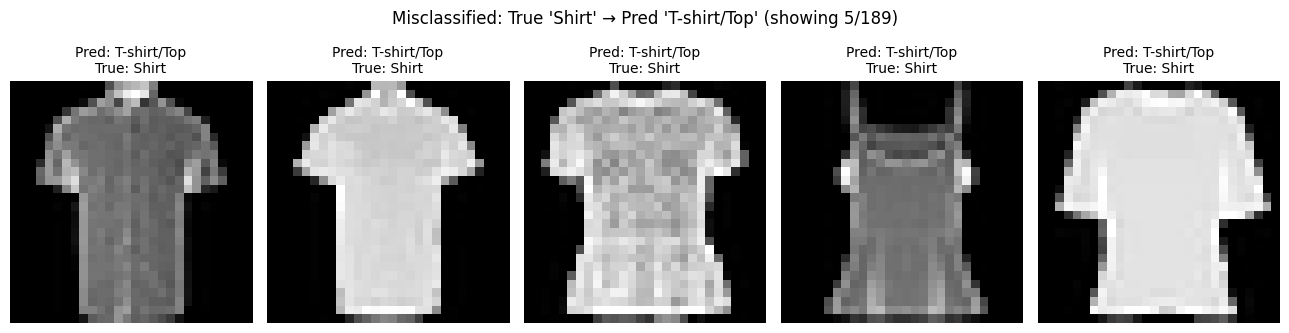

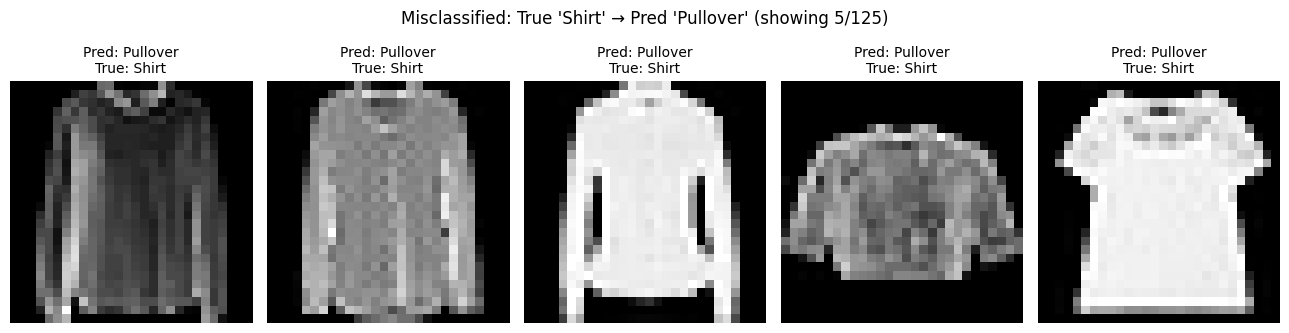

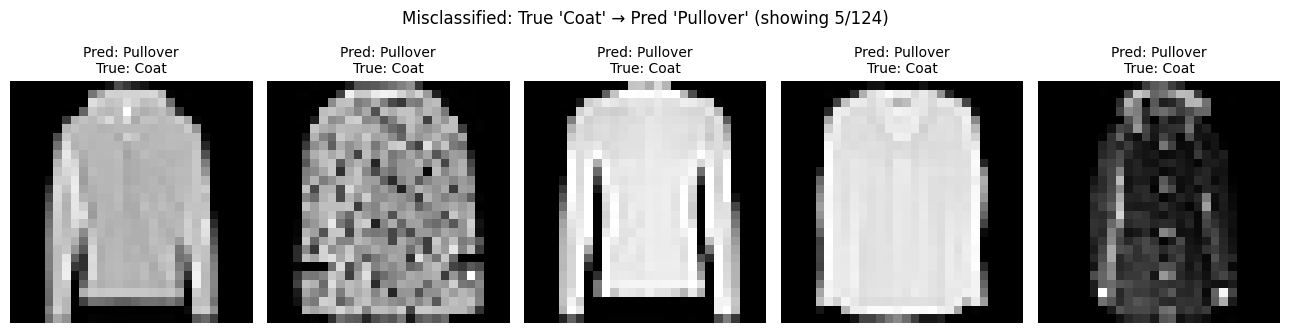

In [ ]:
rng = np.random.RandomState(42)

for (true_lab, pred_lab, count) in top3_pairs:

    idxs = np.where((y_test == true_lab) & (y_pred == pred_lab))[0]
    n_show = min(5, len(idxs))
    if n_show == 0:
        print(f"\nNo examples for pair True={true_lab} Pred={pred_lab}, skipping.")
        continue

    sel = rng.choice(idxs, size=n_show, replace=False)

    n_cols = n_show
    plt.figure(figsize=(2.6*n_cols, 3.2))
    for k, idx in enumerate(sel):
        ax = plt.subplot(1, n_cols, k+1)
        ax.imshow(x_test[idx], cmap="gray", vmin=0, vmax=255)
        ax.set_title(f"Pred: {local_class_names[pred_lab]}\nTrue: {local_class_names[true_lab]}", fontsize=10)
        ax.axis("off")
    plt.suptitle(
        f"Misclassified: True '{local_class_names[true_lab]}' → Pred '{local_class_names[pred_lab]}' (showing {n_show}/{count})",
        y=1.05, fontsize=12
    )
    plt.tight_layout()
    plt.show()

In [ ]:
# These errors occured because of visual similarity with low resolution, pixels, lazy learner k-NN, texture similarity.